In [170]:
#Importation des bibliothèques de base
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = sm.datasets.co2.load_pandas().data


In [171]:
df=data

In [172]:
df.shape

(2284, 1)

In [173]:
df

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [174]:
df.index.name = 'date'


In [175]:
df = df.reset_index().rename(columns={'index': 'date'})


In [176]:
df

,date,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4
...,...,...
2279,2001-12-01,370.3
2280,2001-12-08,370.8
2281,2001-12-15,371.2
2282,2001-12-22,371.3


In [177]:
print(df)


           date    co2
0    1958-03-29  316.1
1    1958-04-05  317.3
2    1958-04-12  317.6
3    1958-04-19  317.5
4    1958-04-26  316.4
...         ...    ...
2279 2001-12-01  370.3
2280 2001-12-08  370.8
2281 2001-12-15  371.2
2282 2001-12-22  371.3
2283 2001-12-29  371.5

[2284 rows x 2 columns]


In [178]:

df.head(5)

,date,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [179]:
df.tail(5)

,date,co2
2279,2001-12-01,370.3
2280,2001-12-08,370.8
2281,2001-12-15,371.2
2282,2001-12-22,371.3
2283,2001-12-29,371.5


In [180]:
df.isna().sum()

date     0
co2     59
dtype: int64

In [181]:
df = df.dropna()


In [182]:
# Afficher des statistiques descriptives sur df avec arrondi à deux décimales
df.info()
print (df.describe().round(decimals=2))

<class 'pandas.core.frame.DataFrame'>
Index: 2225 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2225 non-null   datetime64[ns]
 1   co2     2225 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.1 KB
                                date      co2
count                           2225  2225.00
mean   1980-07-12 10:02:32.089887616   340.14
min              1958-03-29 00:00:00   313.00
25%              1969-11-29 00:00:00   324.80
50%              1980-08-02 00:00:00   338.30
75%              1991-05-04 00:00:00   354.80
max              2001-12-29 00:00:00   373.90
std                              NaN    17.00


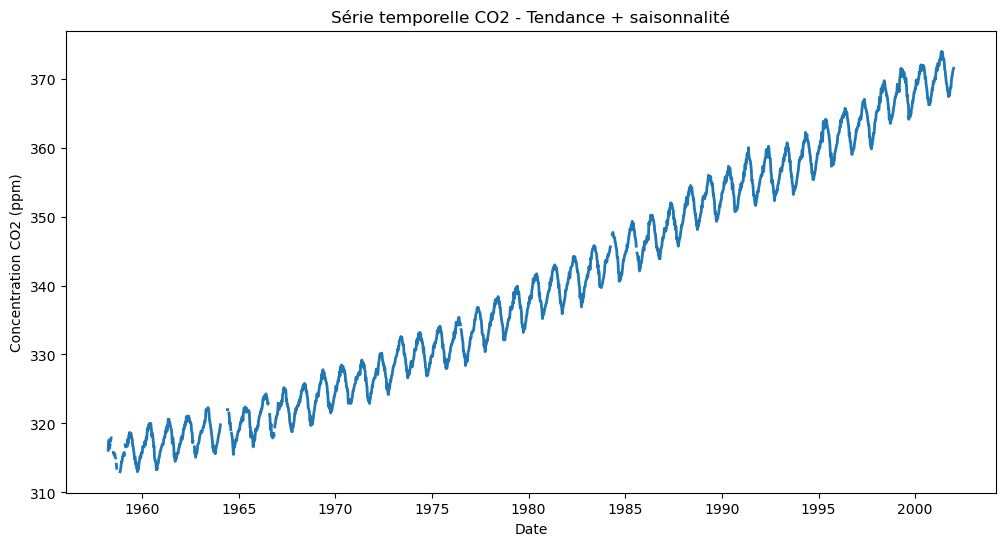

In [183]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Charger les données CO2 (données mensuelles)
data = sm.datasets.co2.load_pandas().data


# Tracer la série
plt.figure(figsize=(12,6))
plt.plot(data.index, data['co2'], linewidth=2)
plt.xlabel('Date')
plt.ylabel('Concentration CO2 (ppm)')
plt.title('Série temporelle CO2 - Tendance + saisonnalité')
plt.show()


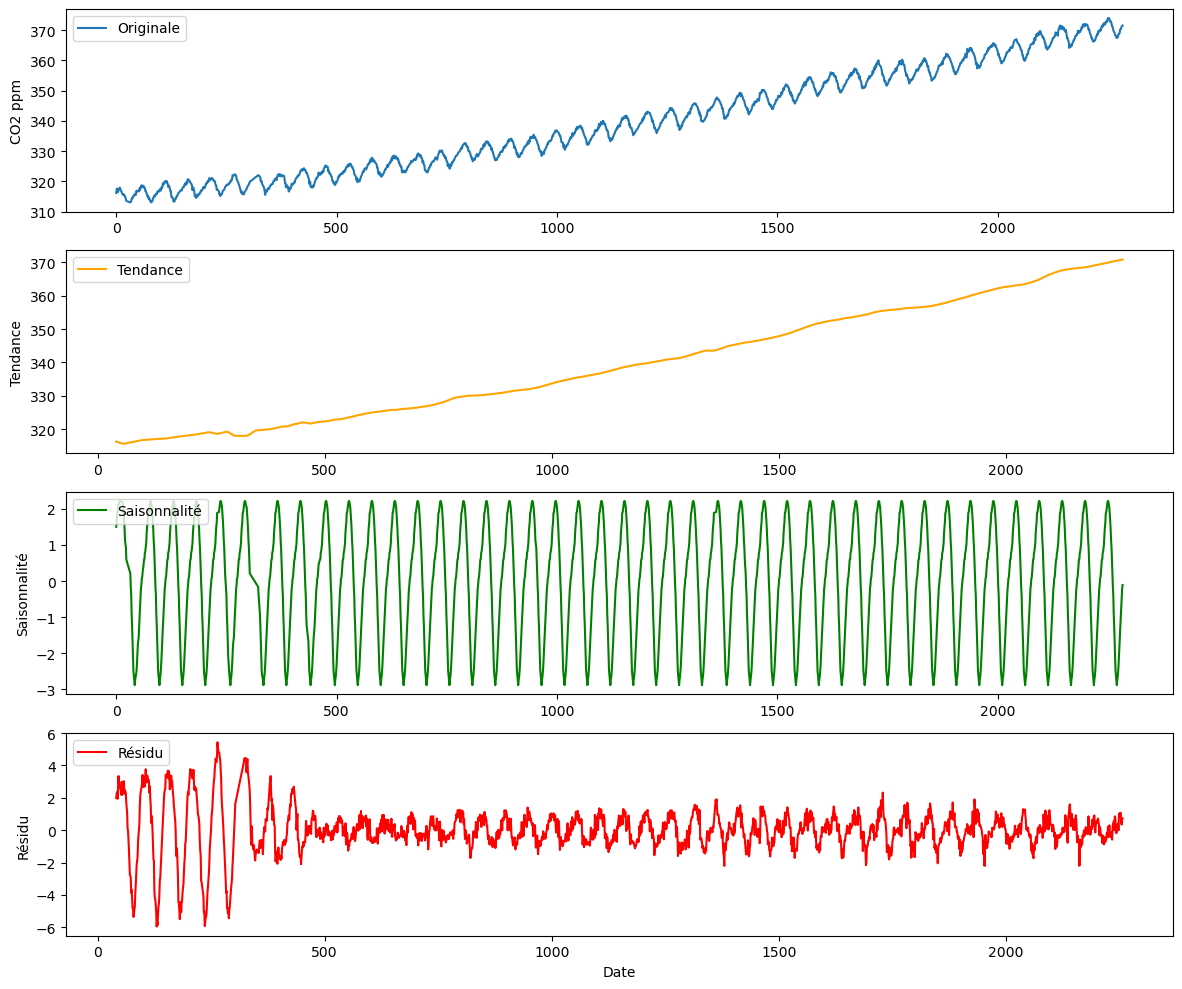

In [184]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Décomposition de la série temporelle avec un modèle additif
decomposition = seasonal_decompose(df['co2'], model="additive", period=52)  # period=52 pour hebdomadaire, sinon 12 pour mensuel

# Extraction des composantes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Affichage des composantes
plt.figure(figsize=(12,10))

plt.subplot(411)
plt.plot(df['co2'], label='Originale')
plt.legend(loc='upper left')
plt.ylabel('CO2 ppm')

plt.subplot(412)
plt.plot(trend, label='Tendance', color='orange')
plt.legend(loc='upper left')
plt.ylabel('Tendance')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalité', color='green')
plt.legend(loc='upper left')
plt.ylabel('Saisonnalité')

plt.subplot(414)
plt.plot(residual, label='Résidu', color='red')
plt.legend(loc='upper left')
plt.ylabel('Résidu')
plt.xlabel('Date')

plt.tight_layout()
plt.show()


In [185]:
from statsmodels.tsa.stattools import adfuller

print('-------------Résultats du Test Dickey-Fuller-------------')

# Appliquer le test ADF sur la colonne 'co2' de votre DataFrame df
result = adfuller(df['co2'], autolag='AIC')

# Afficher la statistique du test et la valeur p
print(f'Statistique ADF : {result[0]:.4f}')
print(f'p-value : {result[1]:.6f}')

# Interprétation du résultat
if result[1] < 0.05:
    print('La série est stationnaire (rejette l\'hypothèse nulle de non-stationnarité).')
else:
    print('La série est non-stationnaire (n\'a pas rejeté l\'hypothèse nulle).')


-------------Résultats du Test Dickey-Fuller-------------
Statistique ADF : 0.0440
p-value : 0.962020
La série est non-stationnaire (n'a pas rejeté l'hypothèse nulle).


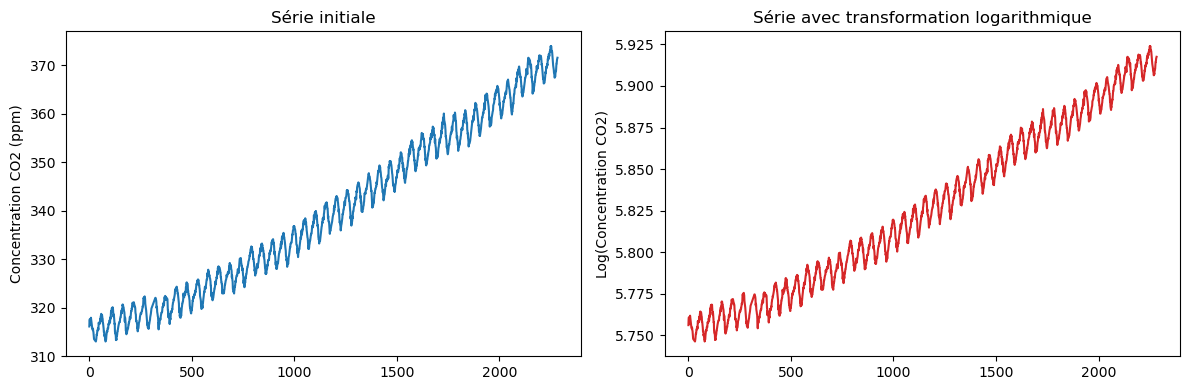

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Transformation logarithmique sur la colonne 'co2'
ts_log = np.log(df['co2'])

# Création de sous-graphiques côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Série initiale
df['co2'].plot(title="Série initiale", color="tab:blue", ax=ax1, legend=False)
ax1.set_ylabel('Concentration CO2 (ppm)')

# Série transformée (logarithme)
ts_log.plot(title="Série avec transformation logarithmique", color="tab:red", ax=ax2, legend=False)
ax2.set_ylabel('Log(Concentration CO2)')

plt.tight_layout()
plt.show()


In [187]:
from statsmodels.tsa.stattools import adfuller

print('-------------Résultats du Test Dickey-Fuller-------------')

# Appliquer le test ADF sur la série logarithmique ts_log
result = adfuller(ts_log.dropna(), autolag='AIC')  # dropna() pour éviter les NaN

# Afficher la statistique ADF et la p-value
print(f'ADF Statistic: {result[0]:.6f}')
print(f'p-value: {result[1]:.6f}')

# Interpréter les résultats
if result[1] < 0.05:
    print('La série est stationnaire (rejette l\'hypothèse nulle de non-stationnarité).')
else:
    print('La série est non-stationnaire (n\'a pas rejeté l\'hypothèse nulle).')


-------------Résultats du Test Dickey-Fuller-------------
ADF Statistic: -0.082007
p-value: 0.951201
La série est non-stationnaire (n'a pas rejeté l'hypothèse nulle).


In [188]:
ts_diff = ts_log.diff()

In [189]:
ts_diff.head()

0         NaN
1    0.003789
2    0.000945
3   -0.000315
4   -0.003471
Name: co2, dtype: float64

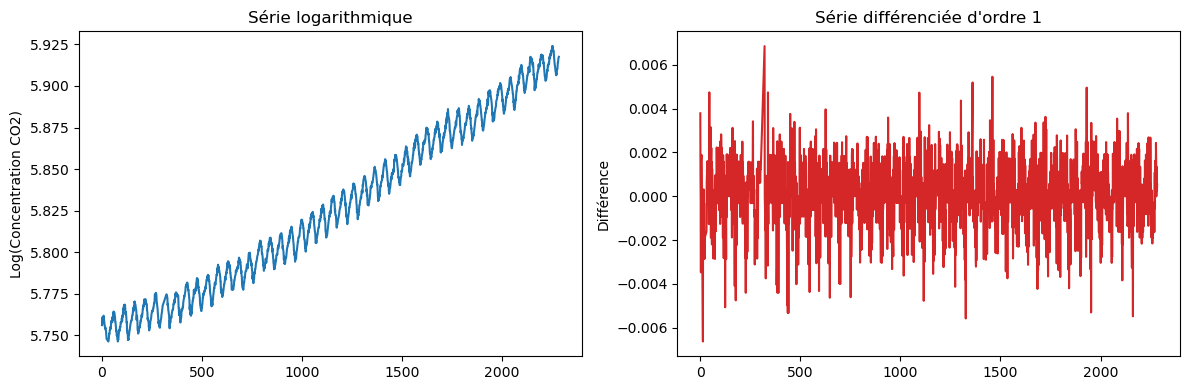

In [190]:
import matplotlib.pyplot as plt

# Différenciation de première ordre et suppression des valeurs NaN
ts_diff = ts_log.diff().dropna()

# Création de sous-graphiques côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Tracer la série initiale (logarithmique)
ts_log.plot(title="Série logarithmique", color="tab:blue", ax=ax1)
ax1.set_ylabel('Log(Concentration CO2)')

# Tracer la série différenciée
ts_diff.plot(title="Série différenciée d'ordre 1", color="tab:red", ax=ax2)
ax2.set_ylabel('Différence')

plt.tight_layout()
plt.show()


In [191]:
print('-------------Résultats du Test Dickey Fuller-------------')

result = adfuller(ts_diff, autolag='AIC')

# Affiche la statistique du test et la valeur p
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpréter les résultats
if result[1] < 0.05:
    print('La série est stationnaire.')
else:
    print('La série est non-stationnaire.')

-------------Résultats du Test Dickey Fuller-------------
ADF Statistic: -15.731667
p-value: 0.000000
La série est stationnaire.


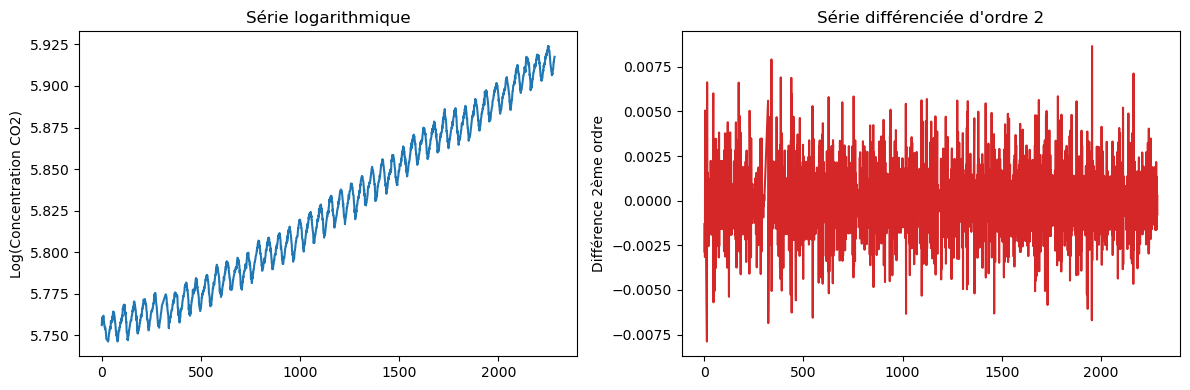

In [192]:
import matplotlib.pyplot as plt

# Différenciation de deuxième ordre et suppression des valeurs NaN
ts_diff2 = ts_diff.diff().dropna()

# Création de sous-graphiques côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Tracer la série initiale (logarithmique)
ts_log.plot(title="Série logarithmique", color="tab:blue", ax=ax1)
ax1.set_ylabel('Log(Concentration CO2)')

# Tracer la série différenciée d'ordre 2
ts_diff2.plot(title="Série différenciée d'ordre 2", color="tab:red", ax=ax2)
ax2.set_ylabel('Différence 2ème ordre')

plt.tight_layout()
plt.show()


In [193]:

print('-------------Résultats du Test Dickey Fuller-------------')

result = adfuller(ts_diff2, autolag='AIC')

# Affiche la statistique du test et la valeur p
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpréter les résultats
if result[1] < 0.05:
    print('La série est stationnaire.')
else:
    print('La série est non-stationnaire.')

-------------Résultats du Test Dickey Fuller-------------
ADF Statistic: -15.163443
p-value: 0.000000
La série est stationnaire.


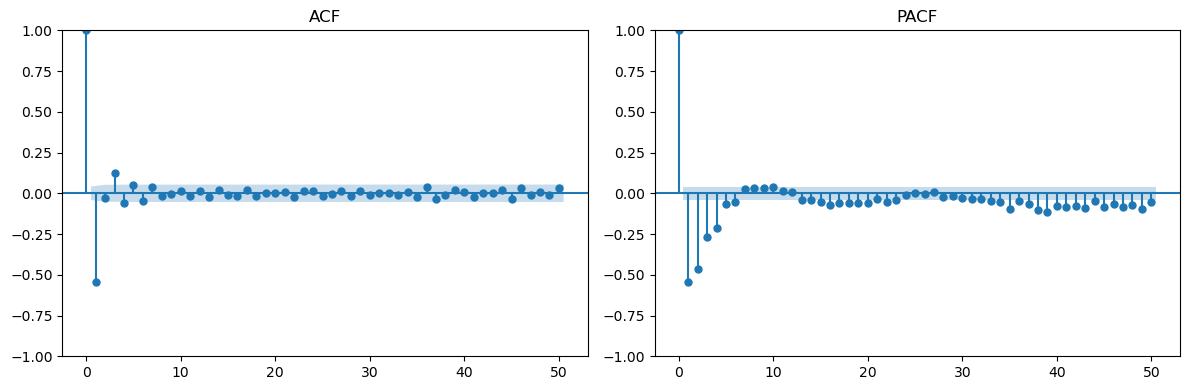

In [194]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Création d'une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Tracé de la fonction d'autocorrélation (ACF) pour la série différenciée deux fois
plot_acf(ts_diff2, lags=50, ax=ax1)
ax1.set_title('ACF')

# Tracé de la fonction d'autocorrélation partielle (PACF) pour la série différenciée deux fois
plot_pacf(ts_diff2, lags=50, ax=ax2, method='ywm')  # 'ywm' est recommandé pour éviter warnings
ax2.set_title('PACF')

plt.tight_layout()
plt.show()


In [195]:
#On va modéliser la série ts_log (non-stationnaire)
#On divise les données en ensembles de test et d'entraînement

size= int(len(df)*0.8)
train_ts= ts_log.iloc[:size]     #80% données d'entraînement
test_ts= ts_log.iloc[size:]      #20% données de test

In [196]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustement du modèle ARIMA(p=2, d=2, q=2) sur les données d'entraînement
model1 = ARIMA(train_ts, order=(2, 2, 2))

# Estimation des paramètres du modèle
model1_fit = model1.fit()

# Affichage du résumé complet du modèle
print(model1_fit.summary())


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                 1780
Model:                 ARIMA(2, 2, 2)   Log Likelihood                9130.267
Date:                Wed, 28 May 2025   AIC                         -18250.533
Time:                        01:59:40   BIC                         -18223.117
Sample:                             0   HQIC                        -18240.407
                               - 1780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5818      0.118     -4.941      0.000      -0.813      -0.351
ar.L2         -0.2419      0.031     -7.907      0.000      -0.302      -0.182
ma.L1         -0.4277      0.118     -3.622      0.0

In [197]:
# Il faut ajuster le modèle aux données d'entraînement train_ts

model2 = ARIMA(train_ts, order = (2,2,1))
model2_fit = model1.fit()
print(model2_fit.summary())

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                 1780
Model:                 ARIMA(2, 2, 2)   Log Likelihood                9130.267
Date:                Wed, 28 May 2025   AIC                         -18250.533
Time:                        01:59:46   BIC                         -18223.117
Sample:                             0   HQIC                        -18240.407
                               - 1780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5818      0.118     -4.941      0.000      -0.813      -0.351
ar.L2         -0.2419      0.031     -7.907      0.000      -0.302      -0.182
ma.L1         -0.4277      0.118     -3.622      0.0

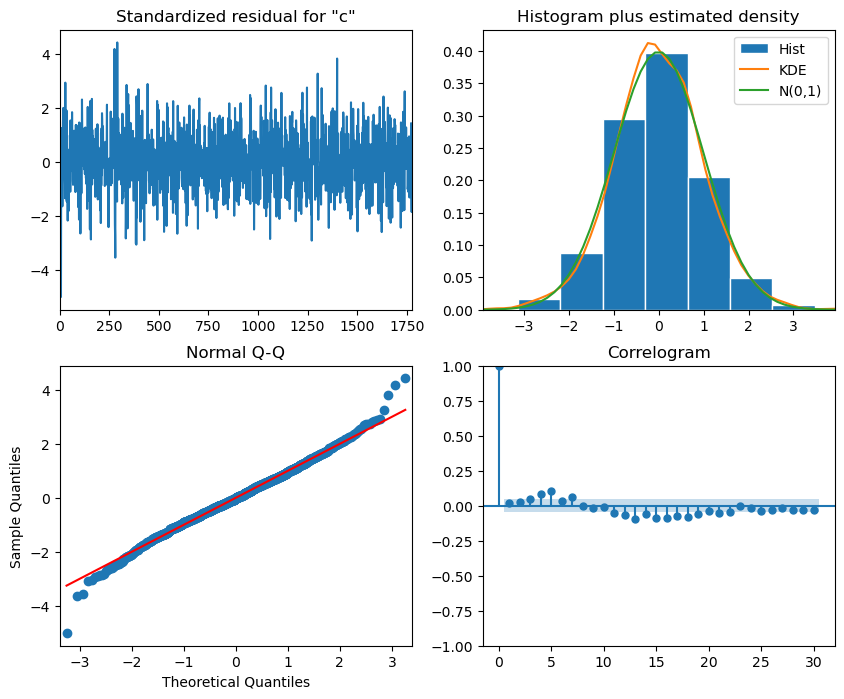

In [198]:
# Diagnostic du résidu pour le modéle ARIMA(2,2,2):
model1_fit.plot_diagnostics(figsize=(10, 8), lags=30);

In [199]:
start_index = test_ts.index[0]
end_index = test_ts.index[-1]
prediction1 = model1_fit.predict(start=start_index, end=end_index)
prediction2 = model2_fit.predict(start=start_index, end=end_index)

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


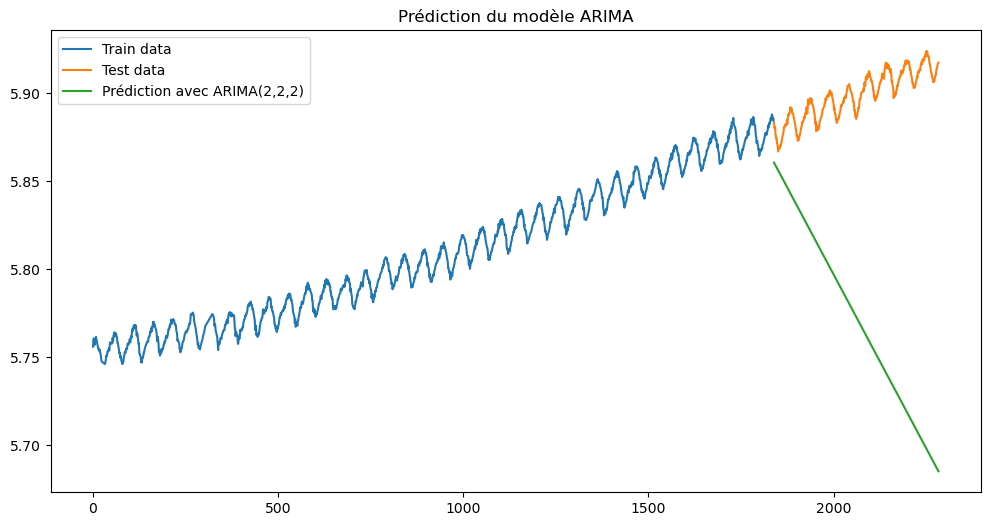

In [200]:
plt.figure(figsize = (12,6))
plt.plot(train_ts, label='Train data')
plt.plot(test_ts, label='Test data')
plt.plot(prediction2, label='Prédiction avec ARIMA(2,2,2)')
plt.title('Prédiction du modèle ARIMA')
plt.legend()
plt.show()

In [201]:
#On va appliquer une différentiation saisoniére pour éliminer la saisonalité
ts_diff_S = ts_diff.diff(12).dropna()

In [202]:
ts_diff_S

19     -0.005375
20     -0.001262
22     -0.002546
23      0.001559
32     -0.003175
          ...   
2279    0.000543
2280    0.001893
2281    0.002710
2282    0.000269
2283   -0.000550
Name: co2, Length: 2212, dtype: float64

In [203]:
print('-------------Résultats du Test Dickey Fuller-------------')

result = adfuller(ts_diff_S, autolag='AIC')

# Affiche la statistique du test et la valeur p
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpréter les résultats
if result[1] < 0.05:
    print('La série est stationnaire.')
else:
    print('La série est non-stationnaire.')


-------------Résultats du Test Dickey Fuller-------------
ADF Statistic: -15.799990
p-value: 0.000000
La série est stationnaire.


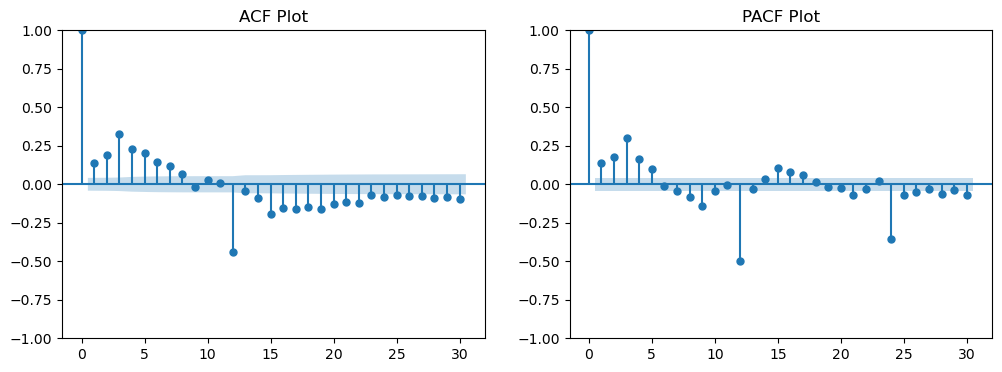

In [204]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF Plot
plot_acf(ts_diff_S, lags=30, ax=ax1)
ax1.set_title('ACF Plot')

# PACF Plot
plot_pacf(ts_diff_S, lags=30, ax=ax2)
ax2.set_title('PACF Plot')

plt.show()

In [205]:
#On va ajuster le modéle SARIMA(2,1,2)(1,1,1,12)

model_S1 = ARIMA(train_ts, order = (2,1,2), seasonal_order=(1,1,1,12))
model_S1_fit = model_S1.fit()
print(model_S1_fit.summary())

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                co2   No. Observations:                 1780
Model:             ARIMA(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                8842.150
Date:                            Wed, 28 May 2025   AIC                         -17670.300
Time:                                    02:00:24   BIC                         -17631.961
Sample:                                         0   HQIC                        -17656.134
                                           - 1780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7948      0.362      2.196      0.028       0.085       1.504
ar.L2          0.0849      0.340   

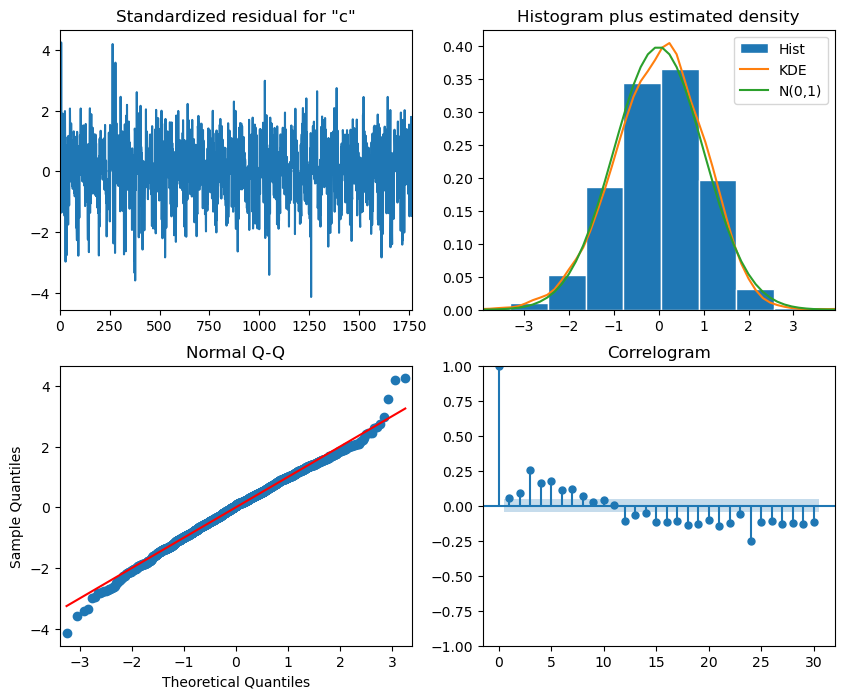

In [206]:
# Diagnostic du résidu pour le modéle (SARIMA(1, 1, 1)(1, 1, 1, 12))
model_S1_fit.plot_diagnostics(figsize=(10, 8), lags=30);

In [207]:
model_S2 = ARIMA(train_ts, order = (0,1,0), seasonal_order=(0,1,1,12))
model_S2_fit = model_S1.fit()
print(model_S2_fit.summary())

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                co2   No. Observations:                 1780
Model:             ARIMA(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                8842.150
Date:                            Wed, 28 May 2025   AIC                         -17670.300
Time:                                    02:00:26   BIC                         -17631.961
Sample:                                         0   HQIC                        -17656.134
                                           - 1780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7948      0.362      2.196      0.028       0.085       1.504
ar.L2          0.0849      0.340   

In [208]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Supposons que model_S2_fit est votre modèle ajusté et model_S2_fit.resid sont les résidus

lb_test = acorr_ljungbox(model_S2_fit.resid, lags=30, return_df=True)

# Afficher les résultats du test sur le premier lag
if lb_test.iloc[0, 1] < 0.05:
    print("Le test de Ljung-Box montre que les résidus ne sont pas indépendants.")
    print("P-value :", lb_test.iloc[0, 1])
else:
    print("Le test de Ljung-Box montre que les résidus sont indépendants.")
    print("P-value :", lb_test.iloc[0, 1])


Le test de Ljung-Box montre que les résidus sont indépendants.
P-value : 0.9664367611839145


In [209]:
! pip install pmdarima


In [210]:
from pmdarima.arima import auto_arima


In [211]:
from pmdarima.arima import auto_arima

model = auto_arima(
    train_ts,
    start_p=0, d=1, start_q=0,
    max_p=2, max_d=2, max_q=2,
    start_P=0, D=1, start_Q=0,
    max_P=1, max_D=1, max_Q=1,
    m=12,
    seasonal=True,
    stepwise=True,           # accélère la recherche en mode pas-à-pas
    error_action='ignore',   # ignore les erreurs
    suppress_warnings=True,
    trace=True               # affiche les modèles testés
)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-16669.658, Time=0.67 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-17106.336, Time=1.82 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-17644.495, Time=1.90 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-16686.557, Time=0.32 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-17520.717, Time=2.09 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-17081.522, Time=1.72 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-17630.160, Time=2.97 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-17626.231, Time=1.56 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-17666.687, Time=2.27 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=-16702.644, Time=1.01 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=-17545.753, Time=1.13 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=-17108.124, Time=2.98 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-17603.830, Time=0.68 sec
 ARIMA(0,1,2)(0,1,1)[12] intercept   : AIC=-17664.833, Time=

In [212]:
model

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [213]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustement du modèle SARIMA(0,1,2)(0,1,1,12) sur la série d'entraînement
model_S2 = SARIMAX(train_ts, order=(0, 1, 2), seasonal_order=(0, 1, 1, 12),
                   enforce_stationarity=False, enforce_invertibility=False)

model_S2_fit = model_S2.fit(disp=False)

print(model_S2_fit.summary())


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                  co2   No. Observations:                 1780
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                8904.886
Date:                              Wed, 28 May 2025   AIC                         -17801.773
Time:                                      02:01:12   BIC                         -17779.899
Sample:                                           0   HQIC                        -17793.687
                                             - 1780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0468      0.024      1.986      0.047       0.001       0.093
ma.L2          0.15

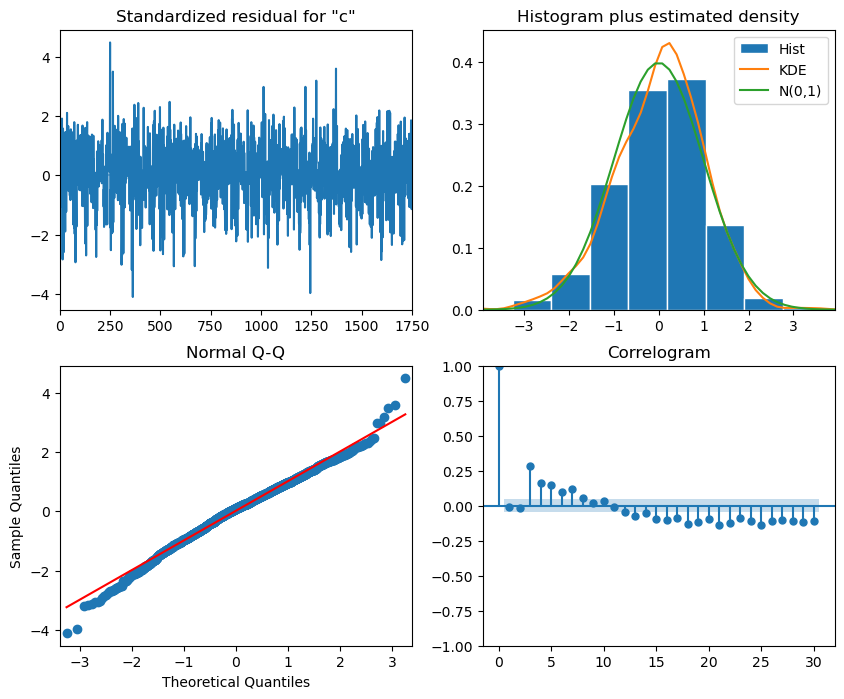

In [214]:

model_S2_fit.plot_diagnostics(figsize=(10, 8), lags=30);

In [215]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(model_S2_fit.resid, lags=30, return_df = True)

# Afficher les résultats du test
if lb_test.iloc[0, 1] < 0.05:
    print("Le test de Ljung-Box montre que les résidus ne sont pas indépendants.")
    print("P-value :", lb_test.iloc[0, 1])
else:
    print("Le test de Ljung-Box montre que les résidus sont indépendants.")
    print("P-value :", lb_test.iloc[0, 1])

Le test de Ljung-Box montre que les résidus sont indépendants.
P-value : 0.9680742181635735


In [216]:
import pandas as pd

Model_Comparison = pd.DataFrame({'Model' : ['model1', 'model2'],
                                 'AIC' : [ model_S1_fit.aic,model_S2_fit.aic],
                                 'BIC' : [ model_S1_fit.bic,model_S2_fit.bic],
                                 'Log-Likelihood' : [model_S1_fit.llf, model_S2_fit.llf] })

Model_Comparison

,Model,AIC,BIC,Log-Likelihood
0,model1,-17670.300004,-17631.960735,8842.150002
1,model2,-17801.772987,-17779.898934,8904.886493


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


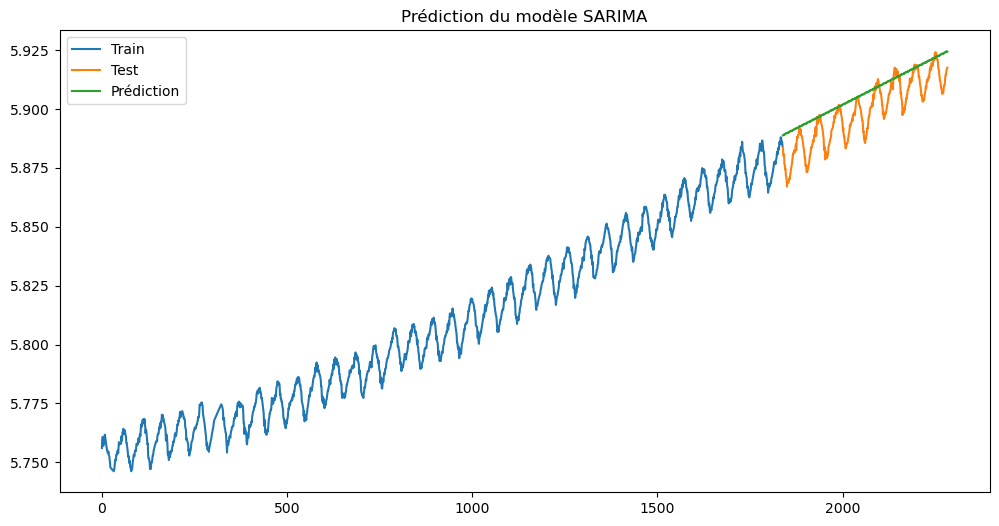

In [217]:
prediction = model_S2_fit.predict(start=start_index, end=end_index)

plt.figure(figsize = (12,6))
plt.plot(train_ts, label='Train')
plt.plot(test_ts, label='Test')
plt.plot(prediction, label='Prédiction')
plt.title('Prédiction du modèle SARIMA')
plt.legend()
plt.show()